In [1]:
#Import important directories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Convert csv file into dataframe
df = pd.read_csv('GOOG.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-08-2004,56.528118,54.321388,55.168217,54.495735,18342897,54.495735
1,24-08-2004,55.591629,51.591621,55.412300,52.239197,15319808,52.239197
2,25-08-2004,53.798351,51.746044,52.284027,52.802086,9232276,52.802086
3,26-08-2004,53.773445,52.134586,52.279045,53.753517,7128620,53.753517
4,27-08-2004,54.107193,52.647663,53.848164,52.876804,6241307,52.876804


In [3]:
# Drop unwanted features from Dataset
df = df.drop(['Adj Close','Date'], axis = True)
df.head()

,High,Low,Open,Close,Volume
0,56.528118,54.321388,55.168217,54.495735,18342897
1,55.591629,51.591621,55.412300,52.239197,15319808
2,53.798351,51.746044,52.284027,52.802086,9232276
3,53.773445,52.134586,52.279045,53.753517,7128620
4,54.107193,52.647663,53.848164,52.876804,6241307


In [4]:
# Check the shape of the Dataset
df.shape

(4120, 5)

In [5]:
# Check for duplicate values present in Dataset
df.duplicated().sum().any()

False

In [6]:
# Check for any missing values present in Dataset
df.isnull().sum().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    4120 non-null   float64
 1   Low     4120 non-null   float64
 2   Open    4120 non-null   float64
 3   Close   4120 non-null   float64
 4   Volume  4120 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 161.1 KB


In [8]:
df.describe()

,High,Low,Open,Close,Volume
count,4120.000000,4120.000000,4120.000000,4120.000000,4.120000e+03
mean,556.017530,545.317446,550.711133,550.806339,6.757302e+06
std,411.462427,403.640155,407.320145,407.731059,7.904012e+06
min,50.680038,49.285267,49.409801,49.818268,7.922000e+03
25%,244.006649,238.985474,241.088841,241.385223,1.688900e+06
50%,355.064133,347.450165,351.452667,350.080307,4.074314e+06
75%,791.232742,782.826004,785.299988,786.330017,8.662247e+06
max,1847.199951,1822.650024,1824.520020,1827.989990,8.254163e+07


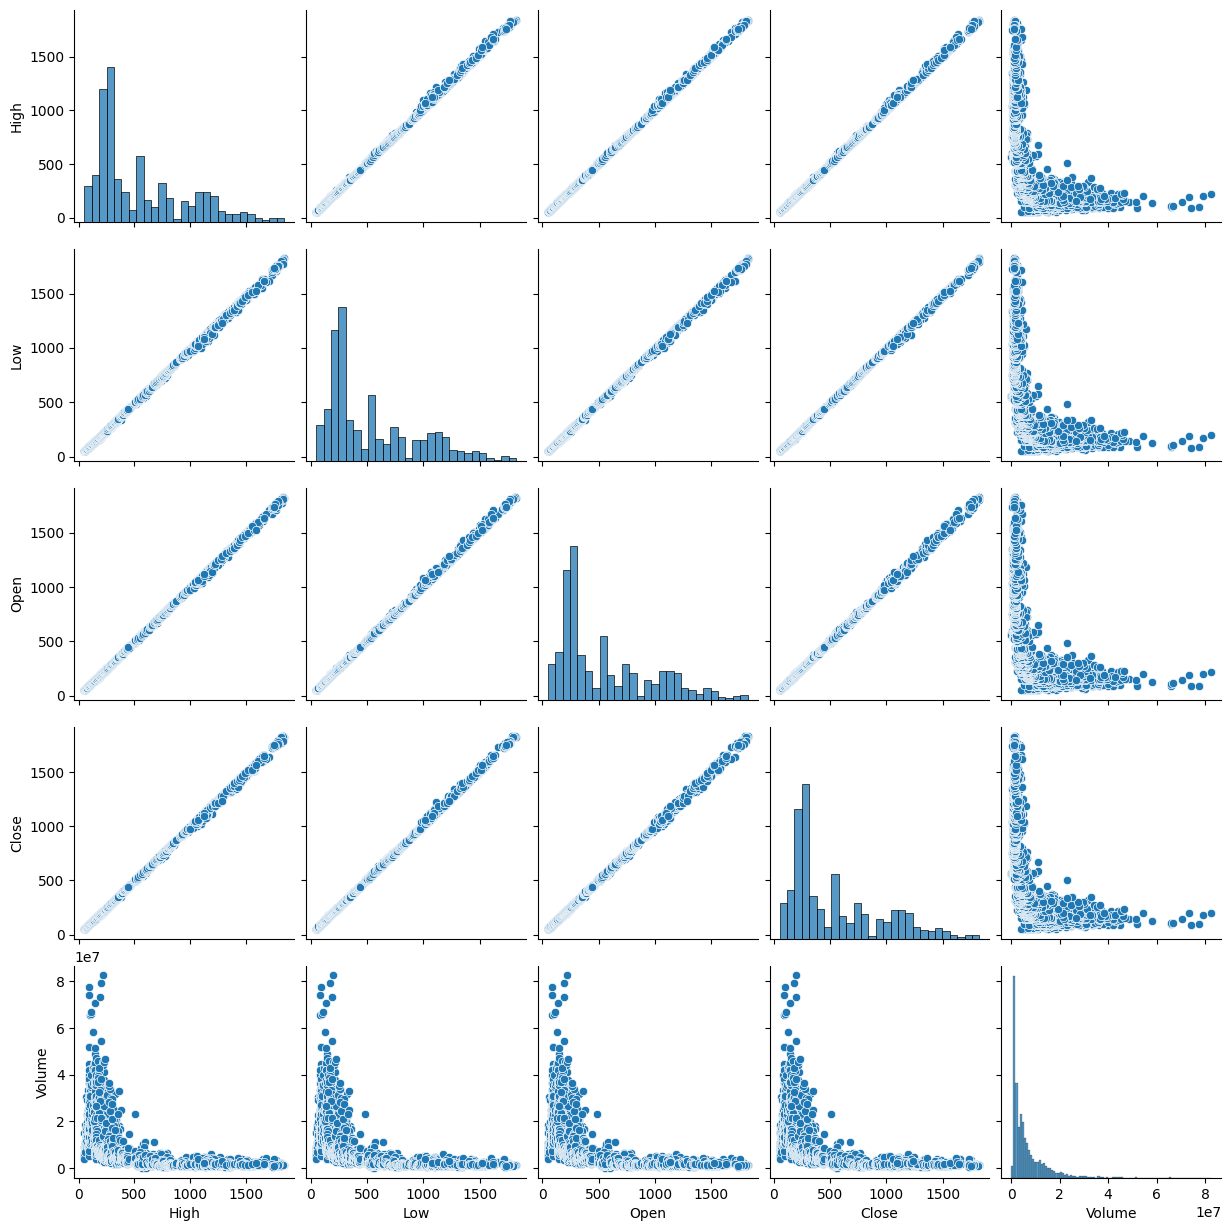

In [9]:
sns.pairplot(df)


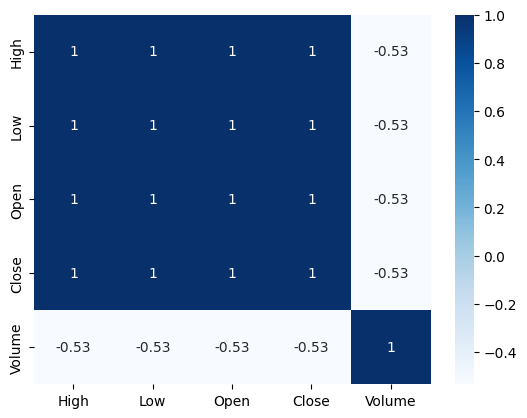

In [10]:
corr = df.corr()
sns.heatmap(df.corr(),cmap = 'Blues', annot=True)
plt.show()

<Axes: >

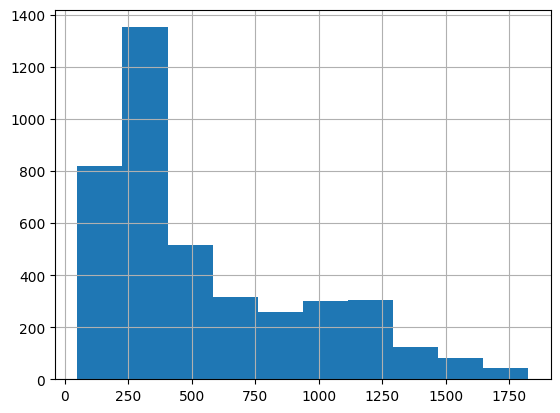

In [11]:
df['Open'].hist()


<Axes: >

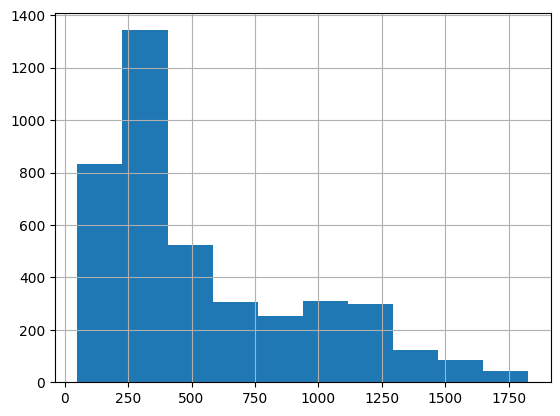

In [12]:
df['Close'].hist()


<Axes: >

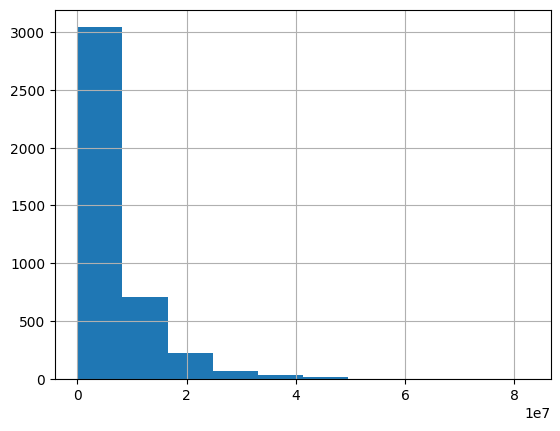

In [13]:
df['Volume'].hist()


<Axes: >

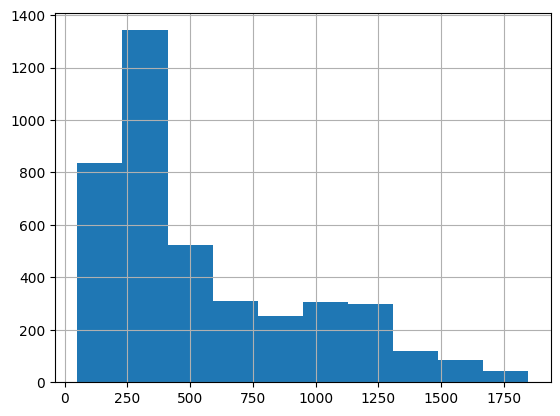

In [14]:
df['High'].hist()


<Axes: >

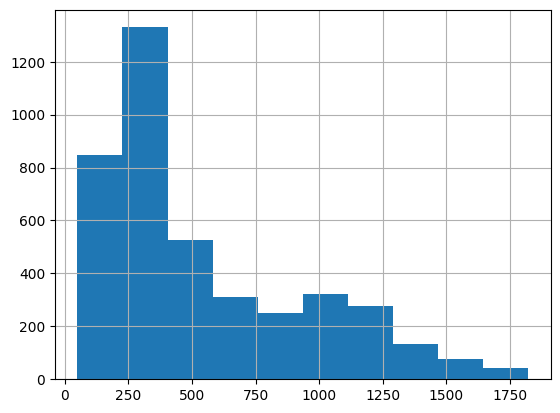

In [15]:
df['Low'].hist()

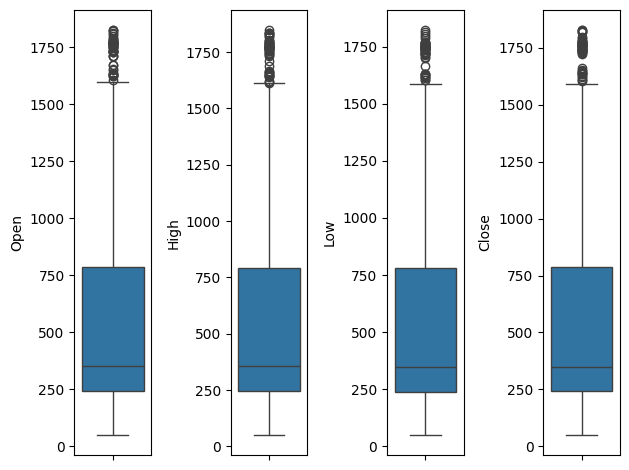

In [16]:
# Review Box Plot
f,axes = plt.subplots(1,4)
sns.boxplot(y='Open',data=df,ax=axes[0])
sns.boxplot(y='High',data=df,ax=axes[1])
sns.boxplot(y='Low',data=df,ax=axes[2])
sns.boxplot(y='Close',data=df,ax=axes[3])
plt.tight_layout()

In [17]:
# Separate the features and Target variable

X = df[['Open','High','Low','Volume']].values
Y = df['Close'].values

In [18]:
# Split the data into Training and Testing Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
# Check the train and test data shape

(X_train.shape),(X_test.shape),(Y_train.shape),(Y_test.shape)

((3296, 4), (824, 4), (3296,), (824,))

In [20]:
# Model Training

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train,Y_train)

In [21]:
# Evaluate the Model

Y_pred = regressor.predict(X_test)
print(Y_pred)

[1113.2235135    92.76332903  629.70158183  194.35708533 1212.58667705
  154.4915456   231.50759366 1453.1553075   246.56260083  727.96682722
  420.59298203  668.44516216 1713.84539129 1161.89220151  810.21447511
  248.27354024 1033.32642666  149.82494182  182.46232283  306.73458863
  302.10861281  162.89615581  342.89913115  178.15143563  505.68704319
  294.59155292 1291.97659337  437.08532449  253.47127298  316.98262783
 1071.69512541  145.271944    535.46624224  362.38469744 1202.00254353
 1453.65996286  762.40360985  915.27208352 1256.40659133  933.10863135
  290.82070116   88.22917948  428.16473377 1407.45380428  919.06322883
  813.16949662  293.52470857  241.4173086  1021.52621243  237.43055895
  367.81246864  245.58627484  537.88437316  242.4525892   259.05003996
  130.14053988  559.49905773 1739.57462571  524.39128615 1244.35804876
  203.86868775  231.81160422  286.61729742 1148.43885566 1060.575948
  554.7610629   179.41746261 1209.59425436 1031.26583485  235.51179803
  802.41

In [22]:
# Calculate the intercept and cofficient values

print('The Coefficient Value : ',regressor.coef_)
print('The Intercept Value : ',regressor.intercept_)

The Coefficient Value :  [-5.63972924e-01  7.59839230e-01  8.04595725e-01 -2.22800511e-09]
The Intercept Value :  0.15462350975758454


In [23]:
# Calculate the Accuracy Score

from sklearn.metrics import confusion_matrix,accuracy_score

In [24]:
# Prediction Table of Actual Prices vs Predicted Values

dframe = pd.DataFrame(Y_test,Y_pred)
dfr = pd.DataFrame({'Actual_Price': Y_test, 'Predicted_Price': Y_pred})
print(dfr)

     Actual_Price  Predicted_Price
0     1114.219971      1113.223513
1       90.560554        92.763329
2      630.380005       629.701582
3      193.644180       194.357085
4     1215.000000      1212.586677
..            ...              ...
819     82.241737        82.702416
820    527.790955       527.236299
821   1090.880005      1097.591918
822    551.854858       549.672458
823    245.086350       244.841021

[824 rows x 2 columns]


In [25]:
dfr.describe()

,Actual_Price,Predicted_Price
count,824.000000,824.000000
mean,558.943886,558.899275
std,419.420511,419.366404
min,50.600338,50.294782
25%,237.055210,237.813610
50%,366.842483,366.058073
75%,809.209976,810.953230
max,1818.550049,1808.874745


<ipython-input-26-77e4994194fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

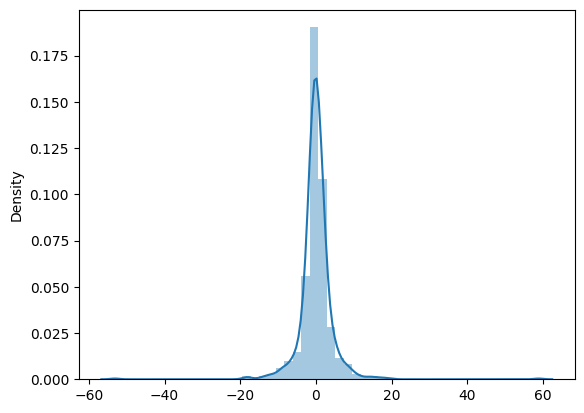

In [26]:
residual = Y_test-Y_pred
sns.distplot(residual)

In [27]:
import scipy.stats

# Finding p value
p_value = scipy.stats.norm.sf(abs(1.67))
print('p-value is :', str(p_value))

p-value is : 0.04745968180294733


In [28]:
# Evaluating the Model

import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
print('Mean Square Error:', mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 2.4572349618860367
Mean Square Error: 21.085095963661225
Root Mean Squared Error: 4.591851038923326


In [29]:
X2 = abs(Y_pred-Y_test)
Y2 = 100*(X2/Y_test)
accuracy = 100 - np.mean(Y2)
print('Accuracy : ', round(accuracy,2),'%.')

Accuracy :  99.53 %.


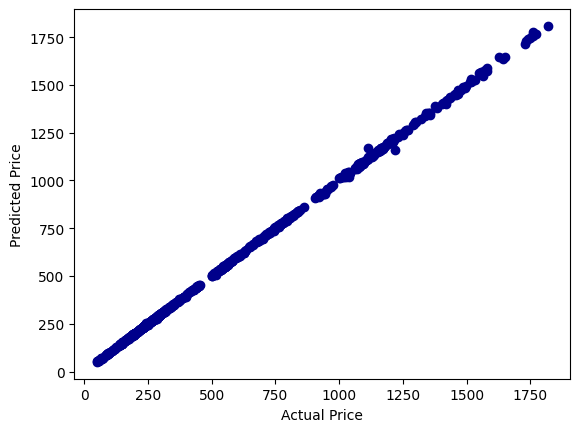

In [30]:
plt.scatter(dfr.Actual_Price,dfr.Predicted_Price,color='Darkblue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

<Axes: >

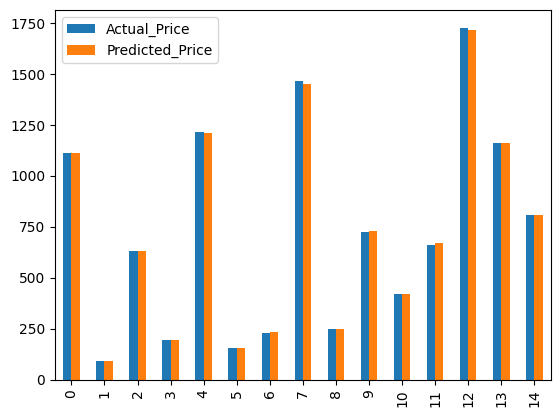

In [33]:
# Graph for first 15 values

graph = dfr.head(15)
graph.plot(kind='bar')